In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import *
import seaborn as sns

## Boston housing prices

In [9]:
# Load the Boston dataset into Python using a Pandas dataframe.
import warnings

# The Boston housing prices dataset has an ethical problem. `load_boston` is deprecated
# in 1.0 and will be removed in 1.2.
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    dataset = sk.datasets.load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
df_scaled = pd.DataFrame(sk.preprocessing.scale(dataset.data), columns=dataset.feature_names)
df_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [11]:
# Perform a K-Means analysis on scaled data, with the number of clusters ranging from 2 to 6.

models = {}
for k in range(2, 7):
    models[k] = sk.cluster.KMeans(n_clusters=k).fit(df_scaled)
models

{2: KMeans(n_clusters=2),
 3: KMeans(n_clusters=3),
 4: KMeans(n_clusters=4),
 5: KMeans(n_clusters=5),
 6: KMeans(n_clusters=6)}

In [12]:
# Provide the Silhouette score to justify which value of k is optimal.

for k in range(2, 7):
    silhouette = sk.metrics.silhouette_score(df_scaled, models[k].labels_)
    print(k, silhouette)

2 0.36011768587358606
3 0.25740335019439353
4 0.2809804562187518
5 0.2878157430985236
6 0.2617743548302116


k=2 is optimal since it has the highest Silhouette score.

In [13]:
# Calculate the mean values for all features in each cluster for the optimal clustering
print('Mean:')
df_scaled.groupby(models[2].labels_).mean()

Mean:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.725146,-0.487722,1.153113,-0.005412,1.086769,-0.452263,0.808760,-0.849865,1.085145,1.173731,0.531248,-0.606793,0.829787
1,-0.390124,0.262392,-0.620368,0.002912,-0.584675,0.243315,-0.435108,0.457222,-0.583801,-0.631460,-0.285808,0.326451,-0.446421


In [14]:
print('Centroid coordinates:')
pd.DataFrame(models[2].cluster_centers_, columns=df.columns)

Centroid coordinates:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.725146,-0.487722,1.153113,-0.005412,1.086769,-0.452263,0.808760,-0.849865,1.085145,1.173731,0.531248,-0.606793,0.829787
1,-0.390124,0.262392,-0.620368,0.002912,-0.584675,0.243315,-0.435108,0.457222,-0.583801,-0.631460,-0.285808,0.326451,-0.446421


How do these values differ from the centroid coordinates?

They are the same values, because the centroid that minimizes the SSE of each cluster is just the mean.

## Wine

In [15]:
# Load the wine dataset into Python using a Pandas dataframe.

dataset = sk.datasets.load_wine()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [16]:
df_scaled = pd.DataFrame(sk.preprocessing.scale(dataset.data), columns=dataset.feature_names)
df_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [21]:
# Perform a K-Means analysis on scaled data, with the number of clusters set to 3.
model = sk.cluster.KMeans(n_clusters=3).fit(df_scaled)
model.predict(df_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [18]:
# Given the actual class labels, calculate the Homogeneity/Completeness for the optimal k

h_score = sk.metrics.homogeneity_score(dataset.target, model.labels_)
c_score = sk.metrics.completeness_score(dataset.target, model.labels_)
print(f'Homogeneity={h_score:.4f}, Completeness={c_score:.4f}')

Homogeneity=0.8788, Completeness=0.8730


What information do each of these metrics provide?

A clustering result satisfies homogeneity if all of its clusters contain only data points of a single class.  
A clustering result satisfies completeness if all the data points of a given class are elements of the same cluster.

In our case, homogeneity and completeness are both close to 1 and close to each other, which indicates a good clustering result.

## K-means

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


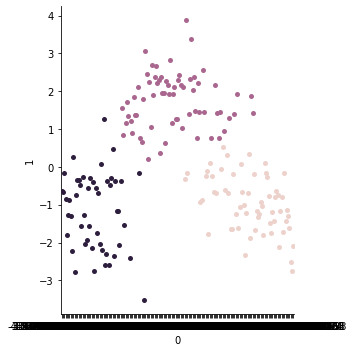

In [92]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn import *
import seaborn as sns

# 读入 UCI ML Wine 数据集，进行标准化和 PCA 预处理
dataset = sk.datasets.load_wine()
data_scaled = sk.preprocessing.scale(dataset.data)
data_pca = sk.decomposition.PCA(n_components=2).fit_transform(data_scaled)
df = pd.DataFrame(data_pca)

# K-means 聚类
def kmeans_cluster(df, k, max_iter=100):
    centroids = df.sample(k)
    for _ in range(max_iter):
        # 将每个点分配到距离最近的 centroid 所代表的 cluster
        distances = sk.metrics.DistanceMetric.get_metric('euclidean').pairwise(df, centroids)
        clusters = np.argmin(distances, axis=1)

        # 计算新的 centroids
        new_centroids = df.groupby(clusters).mean()

        # 如果 centroids 未发生改变，停止迭代，否则继续迭代
        if new_centroids.equals(centroids):
            break
        centroids = new_centroids
    return clusters

clusters = kmeans_cluster(df, 3)
print(clusters)

# 画散点图
try:
    sns.catplot(data=df, x=0, y=1, hue=clusters, kind='strip')
except ValueError:  # Seaborn 目前对 hue 的处理代码不够规范，会引起 Python 警告
    pass

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


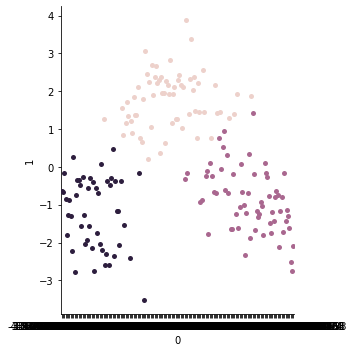

In [94]:
# Perform a K-Means analysis on scaled data, with the number of clusters set to 3.
model = sk.cluster.KMeans(n_clusters=3).fit(df)
clusters = model.predict(df)
print(clusters)

try:
    sns.catplot(data=df, x=0, y=1, hue=clusters, kind='strip')
except ValueError:
    pass